# YOLOv8 - Treinamento de modelo customizado

Lembrando que o dataset que criamos em aula já se encontra devidamente anotado e convertido para o formato usado pelo YOLO. Isso foi explicado detalhadamente na aula sobre criação do dataset, onde além de fazer a preparação é feito o download de imagens do Open Images Dataset direto pelo Colab.

Caso deseje treinar outros objetos:
* Pode procurar pelo [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html) ou [Kaggle](https://www.kaggle.com) por exemplo, se há um dataset para a classe que deseja detectar.
* Ou pode criar você mesmo o dataset.
Além do LabelImg (que mostramos no curso como é possível fazer a anotação) segue outras ferramentas para fazer a anotação direto pelo navegador e assim não precisar baixar nenhum programa:
  * [MakeSense.ai](https://www.makesense.ai), [CVAT](https://www.cvat.ai), ou ainda a plataforma do [Roboflow](https://app.roboflow.com/login) (inclusive eles oferecem uma integração mais direta com YOLOv8).

Obs: se o seu dataset estiver em outro formato de anotação que não seja do YOLO nem o padrão usado pelo OID, então você pode adaptar o nosso script de conversão de anotações, ou ainda dar uma olhada nas ferramentas que o Roboflow oferece para converter o formato das anotações: https://roboflow.com/formats/yolov8-pytorch-txt

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## Preparação do dataset

A estrutura necessária é a seguinte

* /dataset
  * /train
  * /val

In [ ]:
!mkdir dataset #Create the dataset folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Copiando o conjunto de imagens de treinamento

In [ ]:
!cp /content/gdrive/MyDrive/Yolo/recursos/obj.zip ./ #Copy the file

In [ ]:
!unzip obj.zip -d dataset/ #Extract the file

Archive:  obj.zip
   creating: dataset/obj/
  inflating: dataset/obj/dd7e56848a459408.jpg  
  inflating: dataset/obj/9120bd0a24d7b8d2.jpg  
  inflating: dataset/obj/20a2857a64b585d5.jpg  
  inflating: dataset/obj/2c97212dcc87201c.jpg  
  inflating: dataset/obj/45caecf13c17c707.jpg  
  inflating: dataset/obj/f46adef1082d2036.txt  
  inflating: dataset/obj/033152a675a25eb3.jpg  
  inflating: dataset/obj/9b99b37d5c3dfc00.txt  
  inflating: dataset/obj/b781facd601293c5.txt  
  inflating: dataset/obj/23c2ca2c1f00fcc2.txt  
  inflating: dataset/obj/2b29cf604e7bfbd1.jpg  
  inflating: dataset/obj/7272bc29ac1404c4.txt  
  inflating: dataset/obj/5aa83d392fa66a69.txt  
  inflating: dataset/obj/01818937ea80f9a2.jpg  
  inflating: dataset/obj/5bdd5383c4781ba3.jpg  
  inflating: dataset/obj/6f617c67c3d6ec02.txt  
  inflating: dataset/obj/4edf1f2b5c074e9e.txt  
  inflating: dataset/obj/3c6a555349c850c0.jpg  
  inflating: dataset/obj/9e2af43d2822d68b.txt  
  inflating: dataset/obj/c544306e6e49c960.jp

In [ ]:
!mv dataset/obj dataset/train #Rename the folder

### Copiando o conjunto de imagens de validação

In [ ]:
!cp /content/gdrive/MyDrive/Yolo/recursos/valid.zip ./ #Copy the file

In [ ]:
!unzip valid.zip -d dataset #Extract the file

Archive:  valid.zip
   creating: dataset/valid/
  inflating: dataset/valid/f9ff30103bfbff7e.jpg  
  inflating: dataset/valid/b0e92197b17eeeb7.txt  
  inflating: dataset/valid/7ec0563820191541.txt  
  inflating: dataset/valid/7e8f00b4f9edab7d.jpg  
  inflating: dataset/valid/9df087f72bc75a7c.txt  
  inflating: dataset/valid/611b64215baba099.txt  
  inflating: dataset/valid/0d1bf7162cc49f59.txt  
  inflating: dataset/valid/84810eb298f1d8f8.jpg  
  inflating: dataset/valid/44749496c016708d.txt  
  inflating: dataset/valid/805623aa1cf3670c.txt  
  inflating: dataset/valid/6eead8da1dd5dbd8.txt  
  inflating: dataset/valid/b1a6096b82680b08.jpg  
  inflating: dataset/valid/0f8c1cc24a2fb47b.jpg  
   creating: dataset/valid/Label/
  inflating: dataset/valid/4ef03696007ad64f.jpg  
  inflating: dataset/valid/146d425c7b498b56.jpg  
  inflating: dataset/valid/ff0a420679d38eb0.jpg  
  inflating: dataset/valid/72236a985d3d8876.txt  
  inflating: dataset/valid/89fe933a24a773ce.txt  
  inflating: datas

## Instalação das ferramentas do YOLOv8

In [ ]:
!pip install ultralytics #Install the YoloV8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

## Configurações do arquivo YAML

In [ ]:
!touch configs_modelo.yaml #Create a file called configs_modelo.yaml to configuration

Agora, precisamos preencher esse arquivo com os parâmetros necessários

* path: [caminho do diretório que contém o dataset]
* train: [caminho do conjunto de treinamento, relativo ao path]
* val: [caminho do conjunto de validação, relativo ao path]
* test: [não é necessário pois faremos depois um teste manual]

**Número de Classes**
* nc: [coloca o numero de classes que deseja treinar]

**Nomes/Labels - substitua pelos nomes das classes**
* names: [nome de cada classe, dentro de '' e separado por vírgula]

Para escrever esses valores no arquivo, podemos usar o comando %%writefile

In [ ]:
%%writefile configs_modelo.yaml
path: '/content/dataset/'
train: 'train/'
val: 'valid/'
test: # opcional

nc: 3
names: ['Apple', 'Coffe Cup', 'Horse']

Overwriting configs_modelo.yaml


## Treinamento do modelo

In [ ]:
diretorio_raiz = '/content/'
arquivo_config = os.path.join(diretorio_raiz, 'configs_modelo.yaml') #Access the configs_modelo.yaml file

In [ ]:
arquivo_config

'/content/configs_modelo.yaml'

In [ ]:
#!yolo task=detect mode=train data={arquivo_config} epochs=10

> **Parâmetros da função de treinamento:**

* task: o que queremos com o treinamento. Como estamos trabalhando com detecção de objetos, deixe o valor = detect. Outras opções aceitas: segment, e classify. É opcional passarmos se queremos detecção, pois por padrão ele já considera como sendo detecção a não ser que especifique outra forma.
* mode: pode ser train, val, ou predict. Como estamos fazendo pela forma usando python e queremos o treinamento vamos usar a função train(), portanto esse parâmetro se torna desnecessário .
* **model**: o modelo pré-treinado que queremos usar como "partida". Pode ser o YOLOv8 Nano (YOLOv8n), YOLOv8 Small (YOLOv8s), etc.
* **imgsz**: O tamanho da imagem, que a rede realiza o processamento (obs: você não precisa redimensionar a imagem para esse tamanho antes, o algoritmo cuida dessa parte antes de passar a imagem de entrada para a rede). A resolução padrão é 640x640 pixels, portanto o valor padrão é 640. Quando maior o tamanho mais precisa é a detecção, principalmente para objetos com detalhes pequenos, porém é mais demorado o treinamento e detecção.  
* **data**: caminho para o arquivo YAML. Esse é o arquivo que criamos acima, que contém o caminho para o conjunto de treinamento e validaçao, além disso deve conter os nomes das classes que queremos treinar.
* **epochs**: Numero de epocas que desejamos treinar.
* **batch**: O tamanho do batch (lote) para o carregador de dados. Você pode aumentá-lo ou diminuí-lo de acordo com a disponibilidade de memória de sua GPU, por exemplo caso venha a encontrar problema de memória. O valor padrão é 16.
* **name**: Nome do diretório de resultados para o runs/detect. (opcional)

Em nossos testes vamos escolher o Nano, ou até mesmo o Small, pois queremos que seja um treinamento relativamente mais rápido

In [ ]:
model = YOLO('yolov8s.yaml') #Loads the model


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256

In [ ]:
#Train the Neural Network
resultados = model.train(data=arquivo_config, epochs=10, imgsz=640, name='yolov8s_modelo')
#model.train(data=[configFile.yaml], epochs=[amountOfEpochs], imgsz=[imageSize], name='[folderName]')

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/configs_modelo.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_modelo, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 5.17MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/dataset/train... 1499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1499/1499 [00:00<00:00, 1728.60it/s]

train: New cache created: /content/dataset/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<00:00, 1785.63it/s]

val: New cache created: /content/dataset/valid.cache


Plotting labels to runs/detect/yolov8s_modelo/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.812      4.634      4.273         33        640:   2%|▏         | 2/94 [02:35<1:59:09, 77.71s/it]


KeyboardInterrupt: ignored

In [ ]:
#Specify the directory of the model trained
#In a normal situation, the trained model would be saved at /content/runs/detect/yolov8s_modelo directory
#But, for dont be waiting for the model be trained, I am importing it already trained in the Google Drive
dir_resultado = '/content/gdrive/MyDrive/YOLO/yolov8/yolov8s_modelo'

### Avaliação (Verificando o mAP do modelo)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml
#Try validate the Neural Network
#It shows some informations about the accuracy and errors of our Neural Netowork

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [04:11<00:00, 13.24s/it]
                   all        300        502       0.31      0.281      0.222      0.106
                 Apple        300        222      0.302      0.312      0.215      0.113
             Coffe Cup        300        134      0.386      0.352      0.287      0.143
                 Horse        300        146      0.241      0.178      0.164     0.0617
Speed: 5.2ms preprocess, 799.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov8s_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


### Exibindo os gráficos

In [ ]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#resultados_grafico

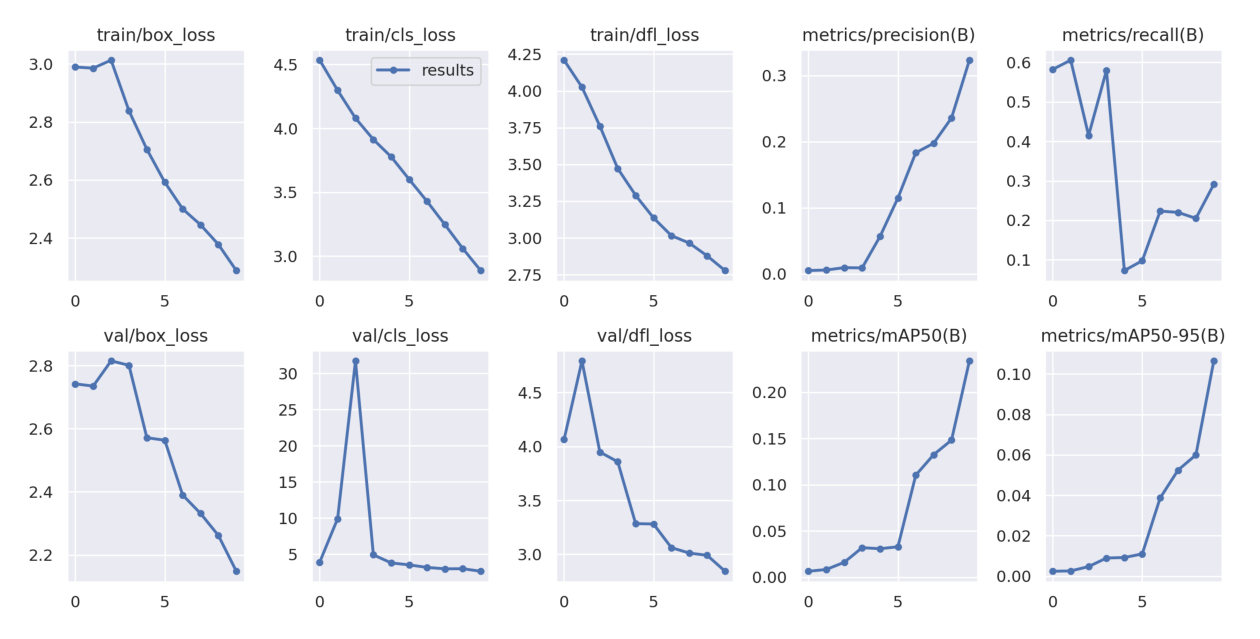

In [ ]:
resultados_grafico = cv2.imread(os.path.join(dir_resultado, 'results.png'))#Storage the resul graphs
mostrar(resultados_grafico)#Show the result graphs

In [ ]:
dir_resultado_val = 'runs/detect/yolov8s_modelo_eval' #Storage the evaluation directory

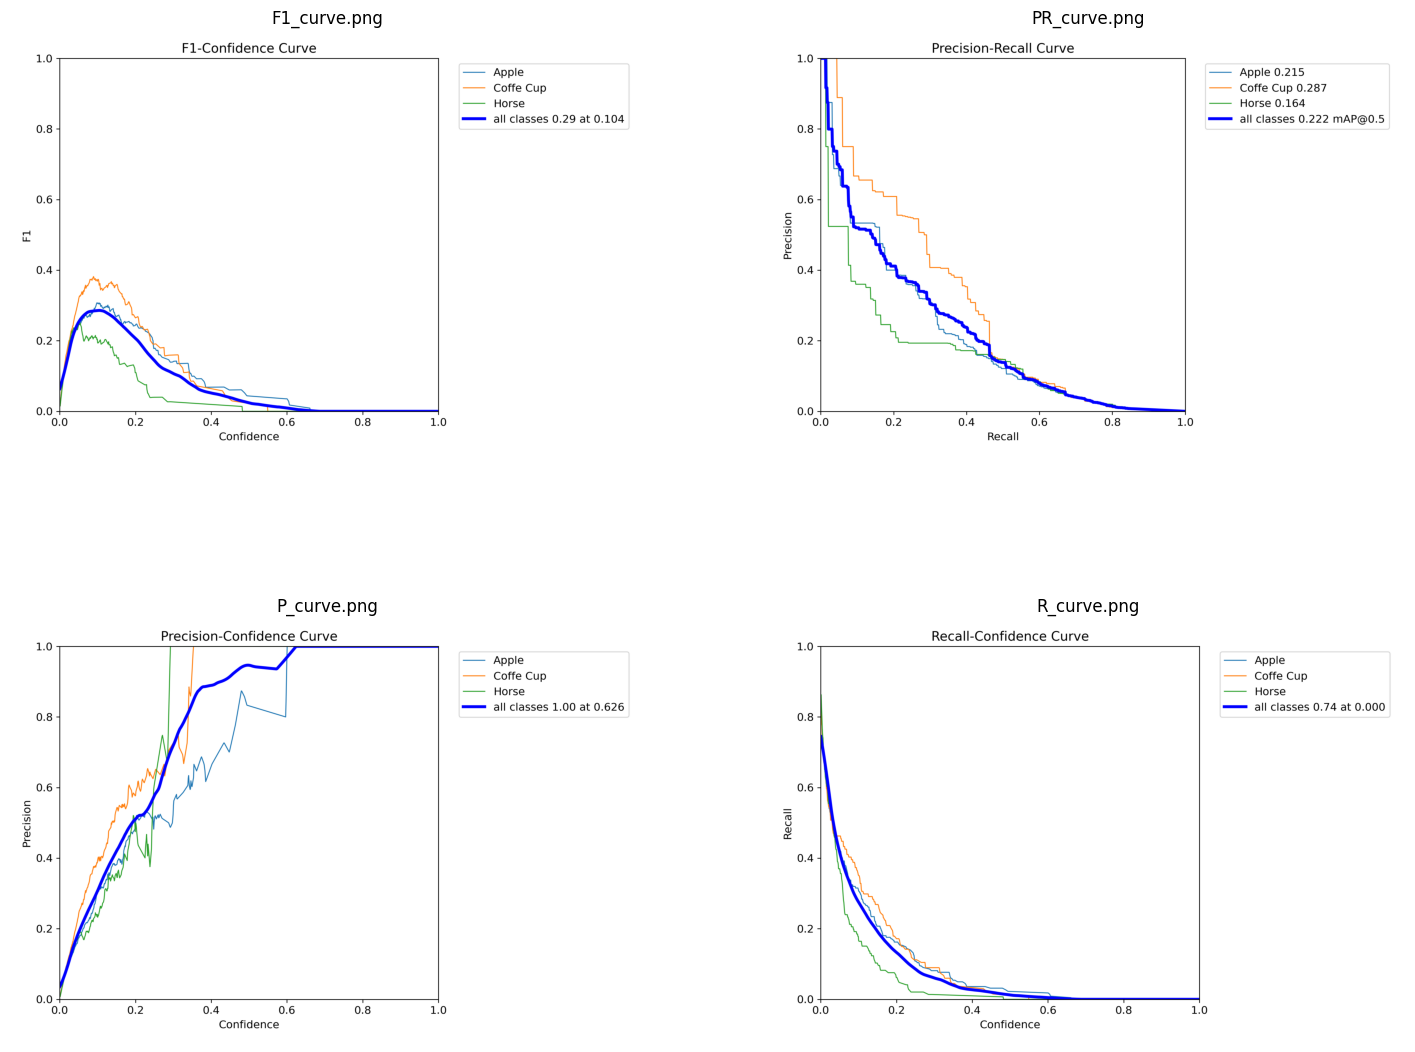

In [ ]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
#Show graphs of the validation
for i, img in enumerate(imgs):
  #print(i, img)
  grafico = cv2.imread(os.path.join(dir_resultado_val, img))
  #print(grafico)
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

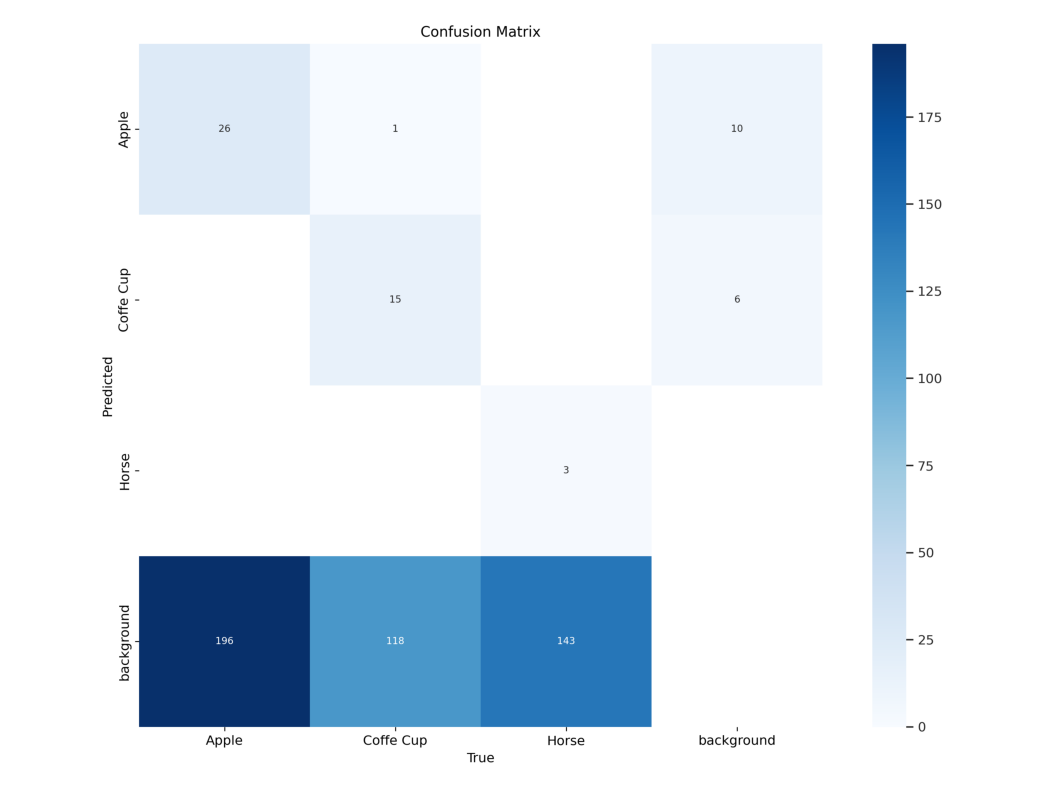

In [ ]:
matriz_confusao = cv2.imread(os.path.join(dir_resultado_val, 'confusion_matrix.png'))#Loads the confusion matrix
mostrar(matriz_confusao)

## Testando o modelo treinado


In [ ]:
!mkdir imagens_teste #Creates directory

In [ ]:
#Try predict the images inside the folder
!yolo task=detect mode=predict model={dir_resultado}/weights/best.pt source='/content/imagens_teste' save=true conf=0.05
#!yolo task=[task] mode=[mode] model=[directoryToModel/model.pt] source='[directoryToImage]' save=true conf=[threshold]

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 /content/imagens_teste/dog.jpg: 480x640 (no detections), 533.0ms
image 2/3 /content/imagens_teste/img-canecas.jpg: 480x640 3 Apples, 5 Coffe Cups, 467.8ms
image 3/3 /content/imagens_teste/person.jpg: 448x640 3 Horses, 431.9ms
Speed: 3.9ms preprocess, 477.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
#Show all the results
dir_predicoes = 'runs/detect/predict/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)
  mostrar(imagem)

Output hidden; open in https://colab.research.google.com to view.

## Continuar treinamento



In [ ]:
#Continue the training with a model that already exist
!yolo task=detect mode=train model={dir_resultado}/weights/last.pt data={arquivo_config} epochs=10

Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8s_modelo/weights/last.pt, data=/content/configs_modelo.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, 

In [ ]:
#Do the evaluation
!yolo task=detect mode=val model={dir_resultado}/weights/best.pt name=yolov8s_modelo_eval data=configs_modelo.yaml

Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:09<00:00,  2.02it/s]
                   all        300        494      0.319      0.284      0.234      0.106
                 Apple        300        231      0.257       0.26      0.178     0.0934
             Coffe Cup        300        126      0.385      0.372       0.33      0.158
                 Horse        300        137      0.314      0.221      0.193     0.0654
Speed: 1.3ms pre-process, 7.4ms inference, 0.0ms loss, 2.1ms post-process per image


In [ ]:
#Try detect the objects
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='imagens_teste' save=true

Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/3 /content/imagens_teste/apple.jpg: 448x640 1 Apple, 22.5ms
image 2/3 /content/imagens_teste/img-canecas.jpg: 480x640 3 Coffe Cups, 22.8ms
image 3/3 /content/imagens_teste/person.jpg: 448x640 2 Horses, 14.7ms
Speed: 0.6ms pre-process, 20.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


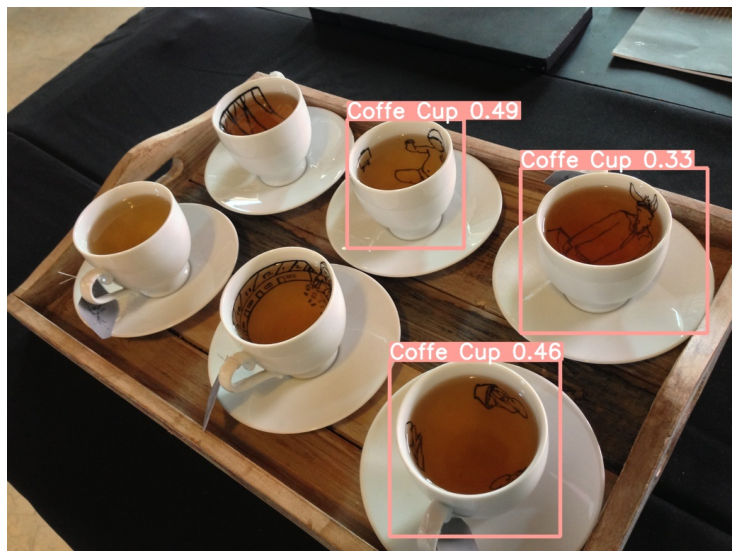

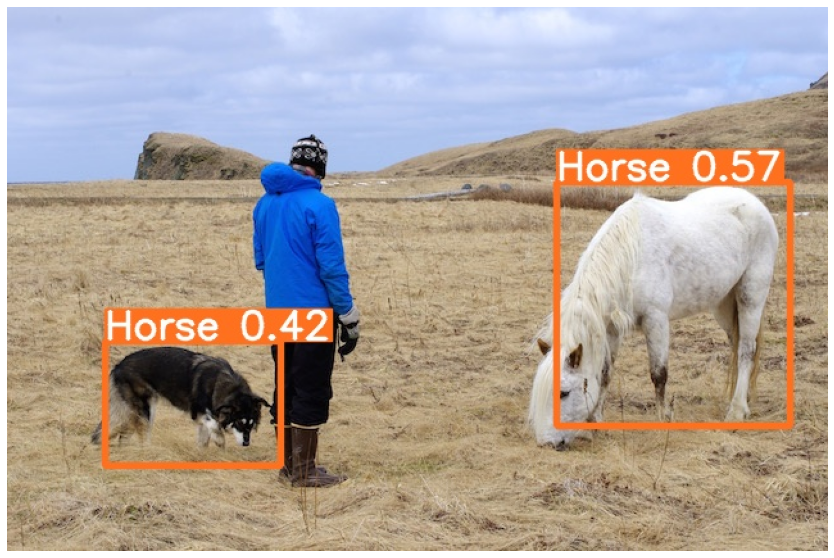

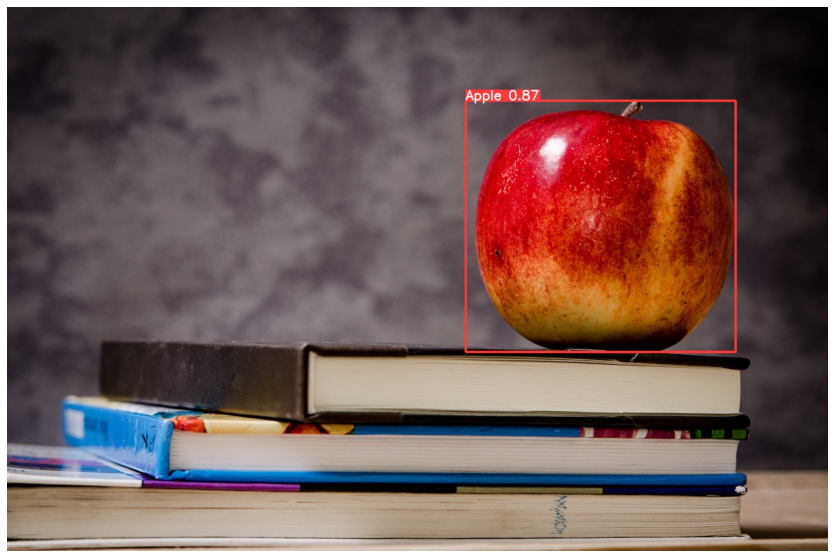

In [ ]:
#Show the objects again
dir_predicoes = 'runs/detect/predict5/'
caminhos = [os.path.join(dir_predicoes, f) for f in os.listdir(dir_predicoes)]
#print(caminhos)
for caminho_imagem in caminhos:
  imagem = cv2.imread(caminho_imagem)
  mostrar(imagem)

## Enviar para o Google Drive

In [ ]:
!cp -R {dir_resultado} /content/gdrive/MyDrive/Cursos\ -\ recursos/YOLO/yolov8 #Copy the model trained to the Google Drive

## Exportar para outros formatos

In [ ]:
os.path.join(dir_resultado, 'weights', 'best.pt')

'/content/runs/detect/yolov8s_modelo/weights/best.pt'

In [ ]:
model_treinado = YOLO(os.path.join(dir_resultado, 'weights', 'best.pt'))
model_treinado.export(format='onnx')#Convert the .pt format to .onnx format

Ultralytics YOLOv8.0.32 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8s summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/runs/detect/yolov8s_modelo/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (21.4 MB)
requirements: YOLOv8 requirement "onnx>=1.12.0" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6

requirements: 1 package updated per ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.13.0...
ONNX: export su

Confira a tabela com os formatos aceitos e qual o valor do parâmetro deve ser usado para salvar no formato específico

| Format                                                                     | `format=`          | Model                     |
|----------------------------------------------------------------------------|--------------------|---------------------------|
| [PyTorch](https://pytorch.org/)                                            | -                  | `yolov8n.pt`              |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)                    | `torchscript`      | `yolov8n.torchscript`     |
| [ONNX](https://onnx.ai/)                                                   | `onnx`             | `yolov8n.onnx`            |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)                     | `openvino`         | `yolov8n_openvino_model/` |
| [TensorRT](https://developer.nvidia.com/tensorrt)                          | `engine`           | `yolov8n.engine`          |
| [CoreML](https://github.com/apple/coremltools)                             | `coreml`           | `yolov8n.mlmodel`         |
| [TensorFlow SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`      | `yolov8n_saved_model/`    |
| [TensorFlow GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`               | `yolov8n.pb`              |
| [TensorFlow Lite](https://www.tensorflow.org/lite)                         | `tflite`           | `yolov8n.tflite`          |
| [TensorFlow Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`          | `yolov8n_edgetpu.tflite`  |
| [TensorFlow.js](https://www.tensorflow.org/js)                             | `tfjs`             | `yolov8n_web_model/`      |
| [PaddlePaddle](https://github.com/PaddlePaddle)                            | `paddle`           | `yolov8n_paddle_model/`   |



